In [1]:
# install pytorch and keras


In [4]:
# pip install tensorflow

In [1]:
# pip install lazypredict

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [6]:
bace_data_mordred = pd.read_csv('combined_bace_inhibitors_ki_and_rdkit_descriptors.csv')
bace_data_mordred.shape

(349, 215)

In [16]:
bace_unscaled = bace_data_mordred[['Ki (nM)']]
bace_unscaled.to_csv('bace_ki_unscaled.csv', index=False)

In [7]:
X = bace_data_mordred.drop(['BindingDB Reactant_set_id', 'Ligand SMILES', 'BindingDB MonomerID', 'BindingDB Ligand Name', 'Target Name', 'Ki (nM)'], axis=1)
X.shape

(349, 209)

In [90]:
# get bace scaled ki 
bace_ki = pd.read_csv('bace_ki_minmax_scale.csv')
bace_ki.describe()

# bace_ki = pd.read_csv('bace_ki_values_log_transformation.csv')
# bace_ki.describe()

,0
count,349.00
mean,0.01
std,0.06
min,0.00
25%,0.00
50%,0.00
75%,0.01
max,1.00


In [17]:
# Normalize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(X)
pd.DataFrame(data_normalized)

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0.35,0.35,1.18,1.50,-1.47,1.10,1.19,1.09,0.77,0.00,...,-0.18,0.00,0.00,-0.05,0.00,-0.44,0.00,-0.22,0.00,0.00
1,0.35,0.35,1.18,1.50,-1.47,1.10,1.19,1.09,0.77,0.00,...,-0.18,0.00,0.00,-0.05,0.00,-0.44,0.00,-0.22,0.00,0.00
2,0.32,0.32,1.98,1.54,-2.22,1.11,1.19,1.11,1.21,0.00,...,-0.18,0.00,0.00,-0.05,0.00,-0.44,0.00,-0.22,0.00,0.00
3,0.45,0.45,0.92,0.01,-1.92,1.71,1.81,1.71,1.01,0.00,...,-0.18,0.00,0.00,-0.05,0.00,-0.44,0.00,-0.22,0.00,0.00
4,0.35,0.35,1.18,1.50,-1.47,1.10,1.19,1.09,0.77,0.00,...,-0.18,0.00,0.00,-0.05,0.00,-0.44,0.00,-0.22,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-1.11,-1.11,0.37,-0.13,0.45,-0.21,-0.30,-0.21,0.12,0.00,...,-0.18,0.00,0.00,-0.05,0.00,-0.44,0.00,-0.22,0.00,0.00
345,0.94,0.94,3.40,-0.90,-0.28,-0.74,-0.79,-0.74,-0.40,0.00,...,-0.18,0.00,0.00,-0.05,0.00,-0.44,0.00,-0.22,0.00,0.00
346,0.29,0.29,0.95,-0.35,-1.04,-0.37,-0.35,-0.36,-0.12,0.00,...,-0.18,0.00,0.00,-0.05,0.00,-0.44,0.00,-0.22,0.00,0.00
347,-1.14,-1.14,-0.39,-0.07,0.95,0.07,0.09,0.07,-0.48,0.00,...,-0.18,0.00,0.00,-0.05,0.00,-0.44,0.00,-0.22,0.00,0.00


### Scale  Descriptors Using Variance Threshold

In [91]:
from sklearn.feature_selection import VarianceThreshold

descriptor_names= column_names = X.columns.tolist()

# Initialize the VarianceThreshold object with your chosen threshold (e.g., 0.01)
variance_threshold = VarianceThreshold(threshold=0.01)

# Fit and transform the data using variance thresholding
data_selected = variance_threshold.fit_transform(data_normalized)

# Get the indices of the selected descriptors
selected_indices = variance_threshold.get_support(indices=True)

# Get the names of the selected descriptors
selected_descriptors = X.columns[selected_indices]

# Print the selected descriptors
print("Selected Descriptors after Variance Thresholding:")
print(len(selected_descriptors))
data_selected.shape

Selected Descriptors after Variance Thresholding:
170


(349, 170)

In [79]:
X.shape

(349, 209)

In [75]:
data_selected.shape

(349, 170)

### Scale Descriptors Using PCA

In [42]:
from sklearn.decomposition import PCA

# Initialize the PCA object with the number of principal components you want to retain (e.g., 2)
pca = PCA(n_components=100)

# Fit and transform the data using PCA
data_pca = pca.fit_transform(data_normalized)

# Optionally, you can also access the explained variance ratio for each principal component
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained Variance Ratio of Principal Components:")
print(len(explained_variance_ratios))


Explained Variance Ratio of Principal Components:
100


### CNN

In [97]:
# Normalizing your data can be crucial for deep learning models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# # scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Reshape the input for CNN and RNN
# CNN expects a 3D input (samples, timesteps, features)
X_cnn = data_selected.reshape(data_selected.shape[0], data_selected.shape[1], 1)
# X_cnn = data_normalized.reshape(data_normalized.shape[0], data_normalized.shape[1], 1)


# Split the data into training and testing sets
X_cnn_train, X_cnn_test, y_train, y_test = train_test_split(data_normalized, bace_ki, test_size=0.2, random_state=119)
# X_rnn_train, X_rnn_test = X_rnn[y_train.index], X_rnn[y_test.index]

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(32, 2, activation='relu', input_shape=X_cnn_train.shape[1:]))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(1))

# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the CNN model
model_cnn.fit(X_cnn_train, y_train, epochs=10, batch_size=32, validation_data=(X_cnn_test, y_test))


Epoch 1/10
9/9 [==============================] - 1s 23ms/step - loss: 6.4522 - val_loss: 2.5153
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 3.5979 - val_loss: 2.1842
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2.8621 - val_loss: 2.0904
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2.5488 - val_loss: 2.1705
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2.3467 - val_loss: 2.1673
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 2.0921 - val_loss: 2.2225
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2.0084 - val_loss: 2.3233
Epoch 8/10
9/9 [==============================] - 0s 8ms/step - loss: 1.8720 - val_loss: 2.3216
Epoch 9/10
9/9 [==============================] - 0s 8ms/step - loss: 1.8179 - val_loss: 2.5009
Epoch 10/10
9/9 [==============================] - 0s 8ms/step - loss: 1.8732 - val_loss: 2.5114


### RNN

In [100]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM

# RNN/LSTM expects a 3D input (samples, timesteps, features)
# X_rnn = data_selected.reshape(data_selected.shape[0], 1, data_selected.shape[1])
X_rnn = data_normalized.reshape(data_normalized.shape[0],1, data_normalized.shape[1])

# Split the data into training and testing sets
X_rnn_train, X_rnn_test = X_rnn[y_train.index], X_rnn[y_test.index]

# Define the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(32, activation='relu', input_shape=X_rnn_train.shape[1:]))
model_rnn.add(Dense(1))

# Compile the RNN model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
model_rnn.fit(X_rnn_train, y_train, epochs=10, batch_size=32, validation_data=(X_rnn_test, y_test))


Epoch 1/10
9/9 [==============================] - 1s 29ms/step - loss: 13.6813 - val_loss: 11.9297
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 11.2294 - val_loss: 9.6837
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 8.7591 - val_loss: 7.5735
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 6.5531 - val_loss: 5.8105
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 5.0136 - val_loss: 4.7978
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 4.0677 - val_loss: 4.4204
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 3.3521 - val_loss: 4.4179
Epoch 8/10
9/9 [==============================] - 0s 6ms/step - loss: 2.9139 - val_loss: 4.2747
Epoch 9/10
9/9 [==============================] - 0s 6ms/step - loss: 2.5958 - val_loss: 4.2322
Epoch 10/10
9/9 [==============================] - 0s 6ms/step - loss: 2.3474 - val_loss: 3.9150


### Evaluate CNN and RNN performance

In [101]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Make predictions using the CNN model
y_pred_cnn = model_cnn.predict(X_cnn_test)

# Make predictions using the RNN model
y_pred_rnn = model_rnn.predict(X_rnn_test)

# Calculate evaluation metrics for the CNN model
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

# Calculate evaluation metrics for the RNN model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

# Print the evaluation metrics
print("CNN Model:")
print(f"MSE: {mse_cnn:.2f}")
print(f"MAE: {mae_cnn:.2f}")
print(f"RMSE: {rmse_cnn:.2f}")
print(f"R-squared: {r2_cnn:.2f}")

print("\nRNN Model:")
print(f"MSE: {mse_rnn:.2f}")
print(f"MAE: {mae_rnn:.2f}")
print(f"RMSE: {rmse_rnn:.2f}")
print(f"R-squared: {r2_rnn:.2f}")

3/3 [==============================] - 0s 2ms/step
CNN Model:
MSE: 2.51
MAE: 1.30
RMSE: 1.58
R-squared: 0.37

RNN Model:
MSE: 3.91
MAE: 1.41
RMSE: 1.98
R-squared: 0.02


### Scale X using PCA

### Visualization

3/3 [==============================] - 0s 3ms/step


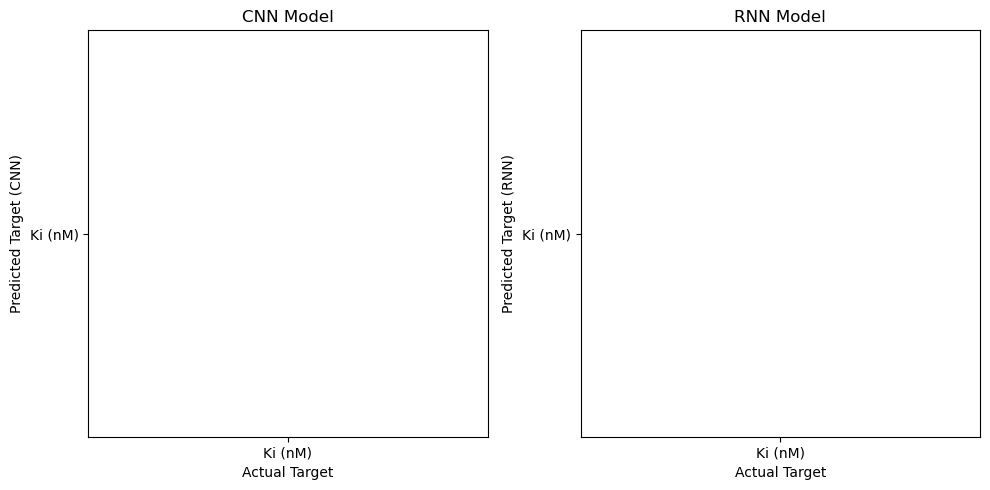

In [102]:
import matplotlib.pyplot as plt

# Make predictions using the CNN model
y_pred_cnn = model_cnn.predict(X_cnn_test)

# Make predictions using the RNN model
y_pred_rnn = model_rnn.predict(X_rnn_test)

# Create scatter plots
plt.figure(figsize=(10, 5))

# Scatter plot for CNN model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_cnn, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target (CNN)')
plt.title('CNN Model')

# Scatter plot for RNN model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rnn, color='r', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target (RNN)')
plt.title('RNN Model')

plt.tight_layout()
plt.show()


### Ensemble ML Methods

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math


X_train, X_test, y_train, y_test = train_test_split(data_selected, bace_ki ,test_size=0.2, random_state = 117)
# 117


In [109]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2score = r2_score(y_test, y_predict)
mse = mean_squared_error(y_predict, y_test)
rmse = math.sqrt(mse)

print(f"r2score => {r2score} \n rmse => {rmse}" )


r2score => -0.7172539433907523 
 rmse => 0.052191803638434814


### Using LazyPredict

In [110]:
from lazypredict.Supervised import LazyRegressor

#Initialize and run LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print the list of models and their performance metrics
models


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:43<00:00,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6019
[LightGBM] [Info] Number of data points in the train set: 279, number of used features: 135
[LightGBM] [Info] Start training from score 0.010838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
QuantileRegressor,52043352730642538558128565894906166112593830493...,-7617940037383907576006144740888837782831452580...,34761925077571202570374276903608045475742208169...,27.75
Lars,27115338339240238026509447221698479951671489183...,-3969056771396034285658893847340331073484733504...,25091619881245573588839301120.00,0.05
TransformedTargetRegressor,584584769268139616632832.00,-855696546320030367744000.00,36842147234.09,0.02
LinearRegression,584584769268139616632832.00,-855696546320030367744000.00,36842147234.09,0.03
RANSACRegressor,606382232964626.75,-887602978687349.75,1186572.88,0.49
SGDRegressor,1589.09,-2323.60,1.92,0.01
MLPRegressor,53.40,-75.70,0.35,0.13
ExtraTreeRegressor,10.09,-12.31,0.15,0.03
PassiveAggressiveRegressor,5.62,-5.76,0.10,0.01


In [112]:
models.to_csv('bace_lazy_predict_ki_rdkit_top_5_model.csv')

In [93]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,13369136540843211088594440305468109961448425408...,-2712578428576883124991003495553277572078782727...,1039542198955073900248056276377927680.00,0.06
RANSACRegressor,741414518383145648128.00,-1504319312661454782464.00,77414263671.79,0.52
TransformedTargetRegressor,4366316882397472256.00,-8859193674429652992.00,5940842924.91,0.03
LinearRegression,4366316882397472256.00,-8859193674429652992.00,5940842924.91,0.04
SGDRegressor,10459.58,-21219.30,290.75,0.00
PassiveAggressiveRegressor,2.69,-2.44,3.70,0.02
KernelRidge,2.65,-2.34,3.65,0.02
GaussianProcessRegressor,2.58,-2.21,3.58,0.04
LinearSVR,2.11,-1.24,2.99,0.14
